In [76]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import random
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_curve, auc
import warnings
import pickle
warnings.filterwarnings('ignore')

In [4]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [48]:
data = pd.read_csv("diabetes.csv")
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [11]:
data.shape

(768, 9)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [13]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [49]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Outcome
0    500
1    268
Name: count, dtype: int64


Text(0.5, 1.0, 'Distribution in target variabel')

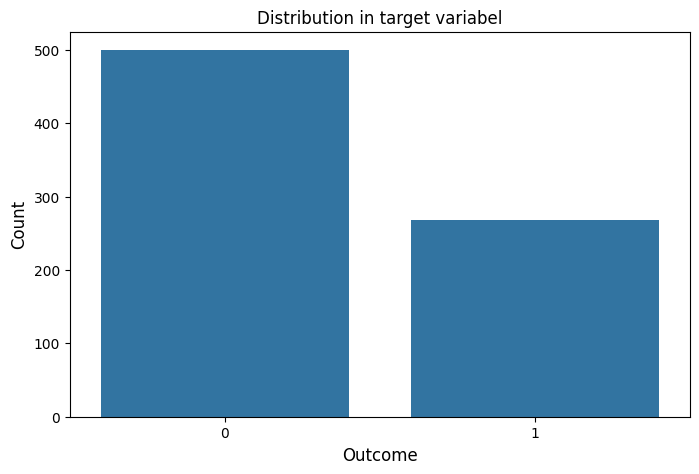

In [50]:
print(data['Outcome'].value_counts())
plt.figure(figsize = (8,5))
sns.countplot(x = data['Outcome'])
plt.xlabel('Outcome', size = 12)
plt.ylabel('Count', size = 12)
plt.title('Distribution in target variabel', size = 12)

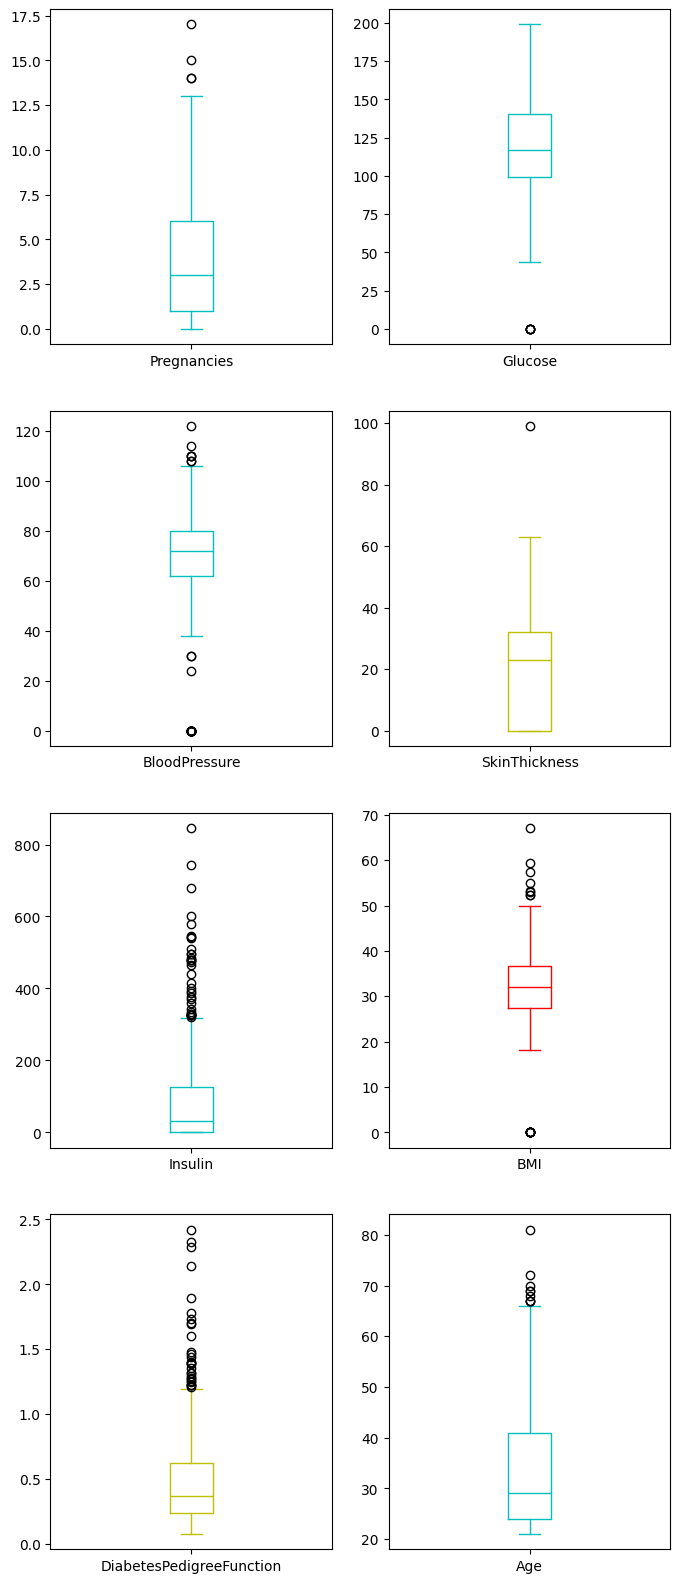

In [51]:
col = data.columns
color = ['r', 'y', 'g', 'c', 'b']
plt.figure(figsize=(8, 20))
for i in range(len(col)-1):
    c = random.choice(color)
    plt.subplot(4, 2, i+1)
    data[col[i]].plot(kind = 'box', color = c)

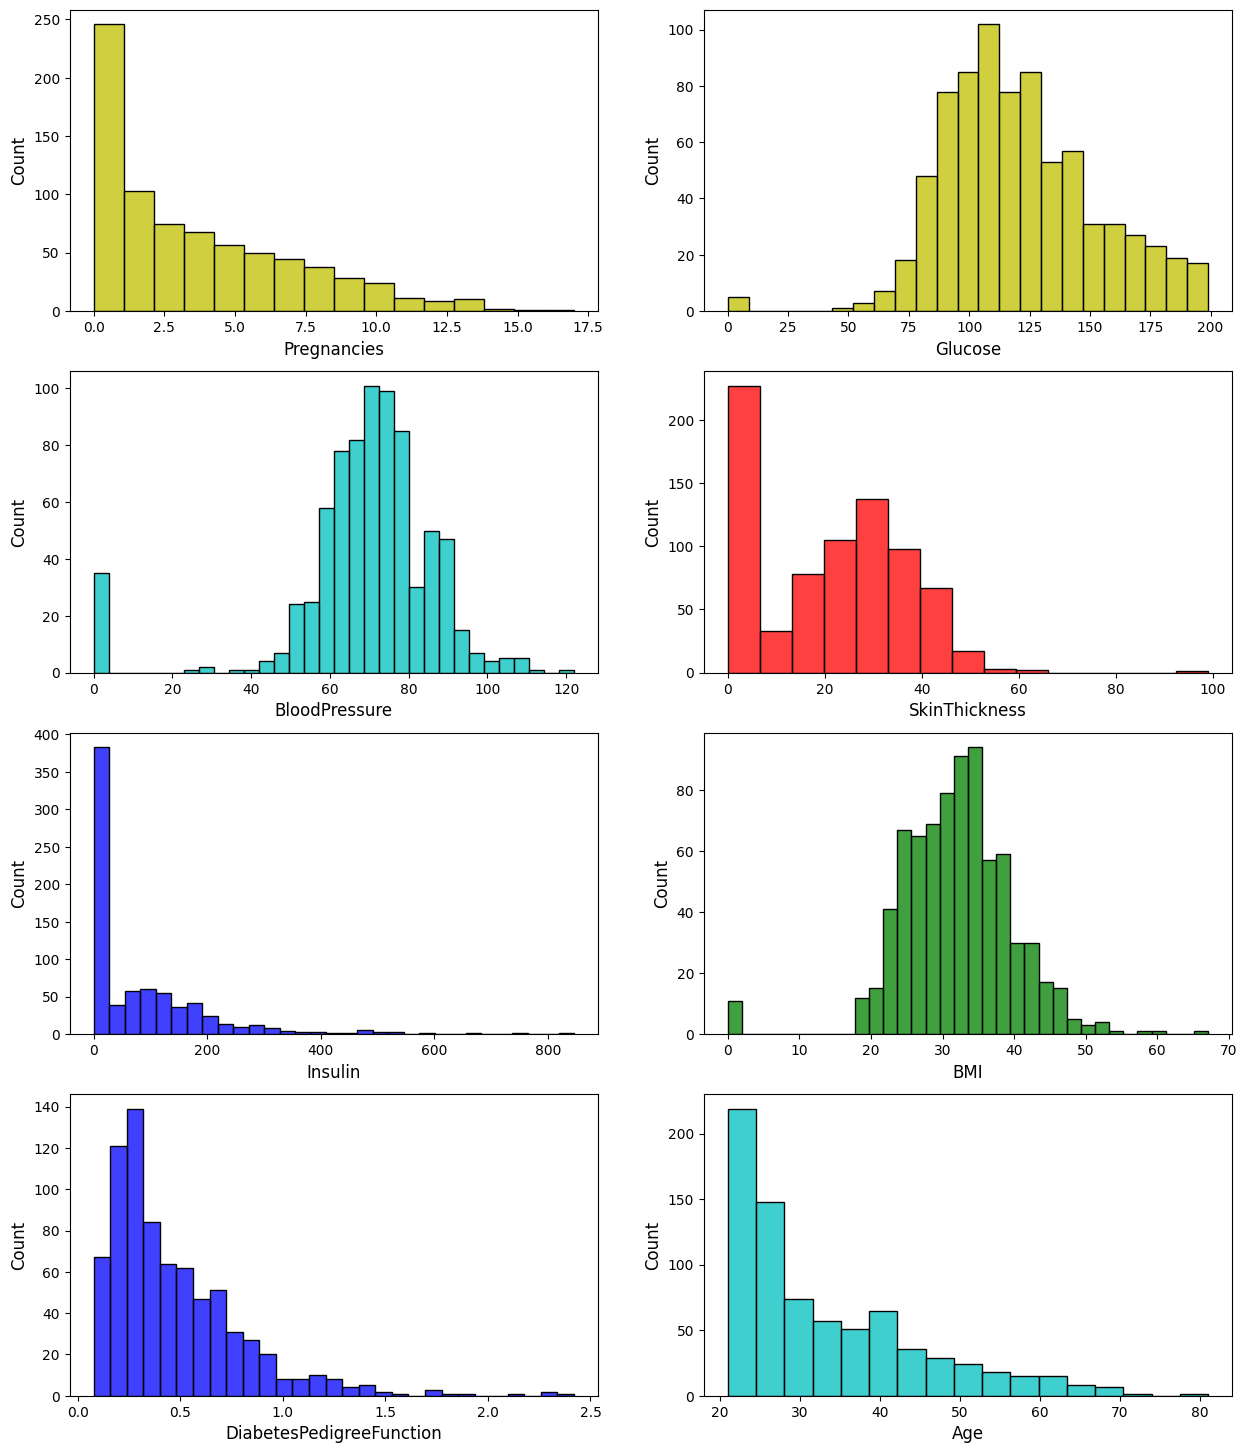

In [52]:
plt.figure(figsize = (15,18))
for i in range (len(col)-1):
    c = random.choice(color)
    plt.subplot(4,2,i+1)
    sns.histplot(data[col[i]], color = c)
    plt.xlabel(col[i], size = 12)
    plt.ylabel('Count', size = 12)

<Axes: >

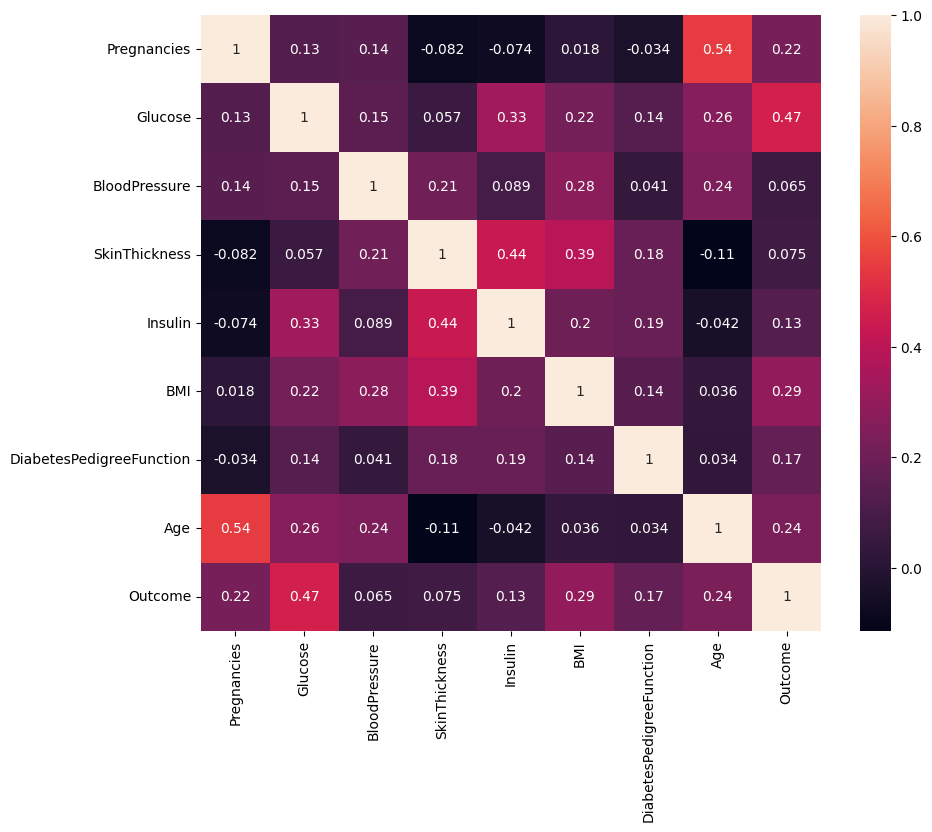

In [18]:
cor = data.corr()
plt.figure(figsize = (10,8))
sns.heatmap(cor, annot = True)

In [53]:
cor['Outcome'].sort_values(ascending = False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

In [55]:
x = data.iloc[:,:-1]
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [59]:
y = data.iloc[:, -1]
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [60]:
col = x.columns
std = StandardScaler()
x = std.fit_transform(x)
x = pd.DataFrame(data = x, columns = col)
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [61]:
over = RandomOverSampler()
x, y = over.fit_resample(x, y)

Outcome
1    500
0    500
Name: count, dtype: int64


Text(0.5, 1.0, 'After Balancing The Class')

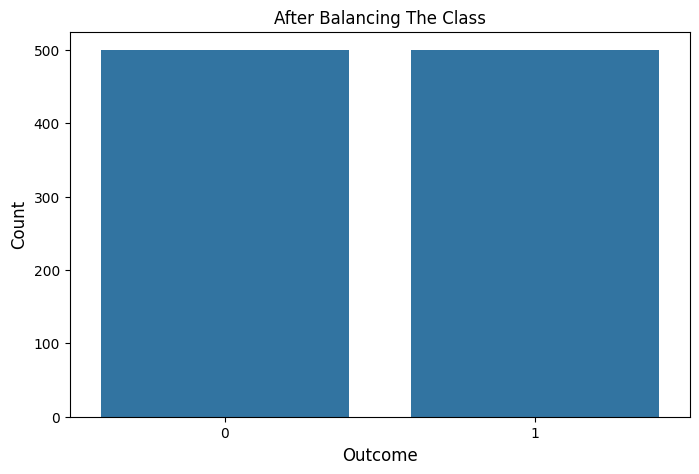

In [64]:
print(y.value_counts())
plt.figure(figsize = (8,5))
sns.countplot(x = y)
plt.xlabel('Outcome', size = 12)
plt.ylabel('Count', size = 12)
plt.title('After Balancing The Class', size = 12)

In [65]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state = 42) 

In [96]:
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Train the classifier on the training data
rf_classifier.fit(xtrain, ytrain)

# Predict on the training set
ytrain_pred = rf_classifier.predict(xtrain)

# Predict on the testing set
ytest_pred = rf_classifier.predict(xtest)

# Calculate accuracy on training set
train_accuracy = accuracy_score(ytrain, ytrain_pred)

# Calculate accuracy on testing set
test_accuracy = accuracy_score(ytest, ytest_pred)

print("Accuracy on training set:", train_accuracy)
print("Accuracy on testing set:", test_accuracy)

Accuracy on training set: 1.0
Accuracy on testing set: 0.852


In [87]:
import pickle

# Assuming `rf_diabetes_model` is your trained RandomForest model instance
with open('diabetes_correct.pkl', 'wb') as file:
    pickle.dump(rf_classifier, file)


Accuracy using Random Forest is 85.2 %


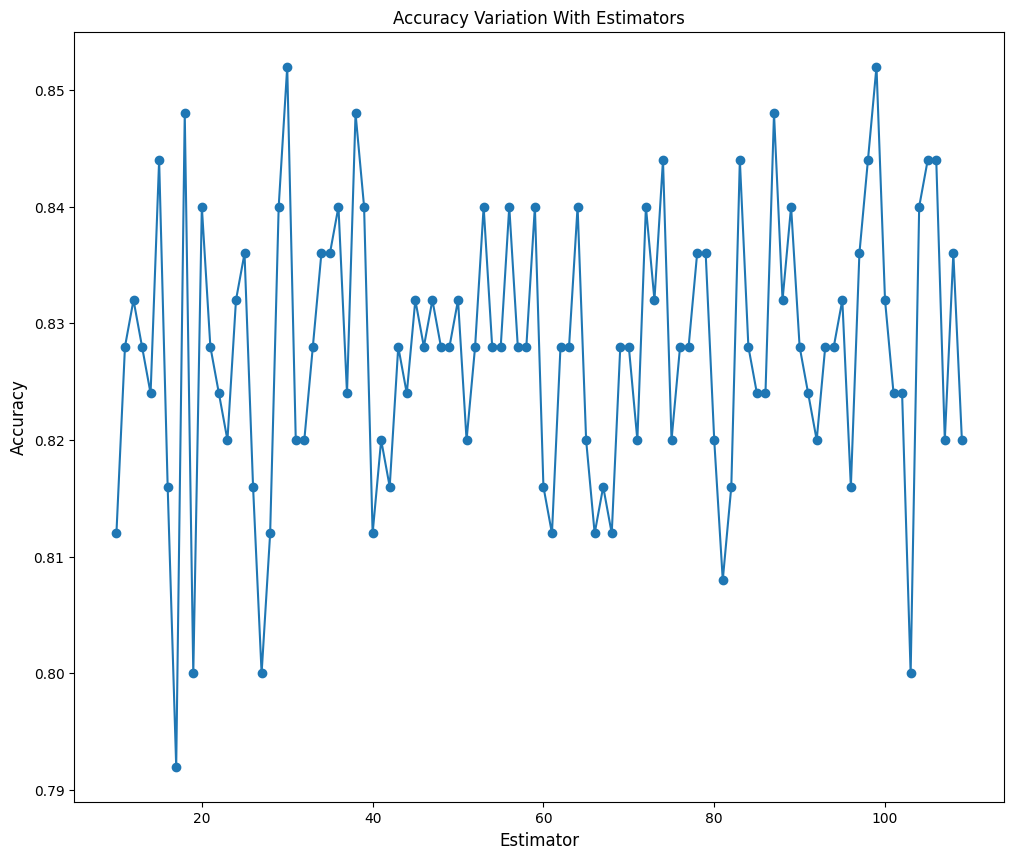

In [98]:
plt.figure(figsize = (12,10))
plt.plot(range (10, 110), l, marker = 'o')
plt.xlabel('Estimator', size = 12)
plt.ylabel('Accuracy', size = 12)
plt.title('Accuracy Variation With Estimators', size = 12)
print("Accuracy using Random Forest is {} %".format(best_acu*100))

Accuracy using Random Forest is 85.2 %


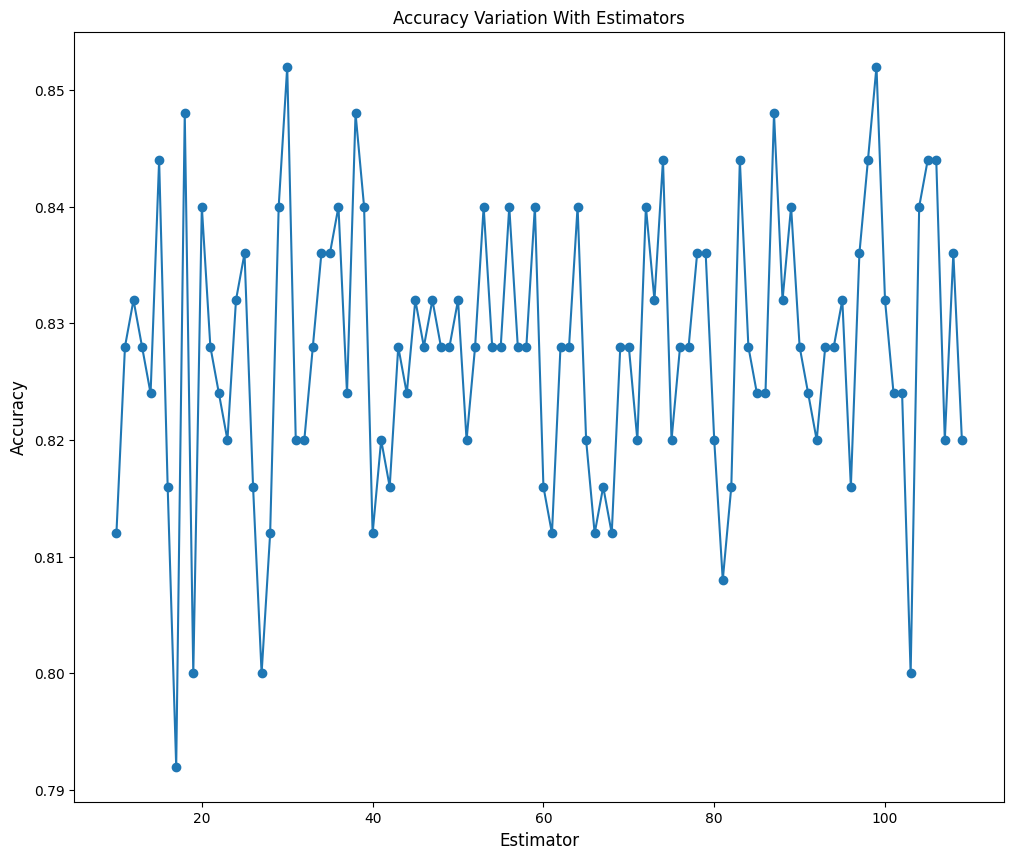

In [72]:
plt.figure(figsize = (12,10))
plt.plot(range (10, 110), l, marker = 'o')
plt.xlabel('Estimator', size = 12)
plt.ylabel('Accuracy', size = 12)
plt.title('Accuracy Variation With Estimators', size = 12)
print("Accuracy using Random Forest is {} %".format(best_acu*100))

In [77]:
filename = 'diabetes.pkl'
with open(filename, 'wb') as file:
    pickle.dump(best_model, file)

print(f"The best model was saved to {filename}")

The best model was saved to diabetes.pkl


AUC value is 0.8560178883919891


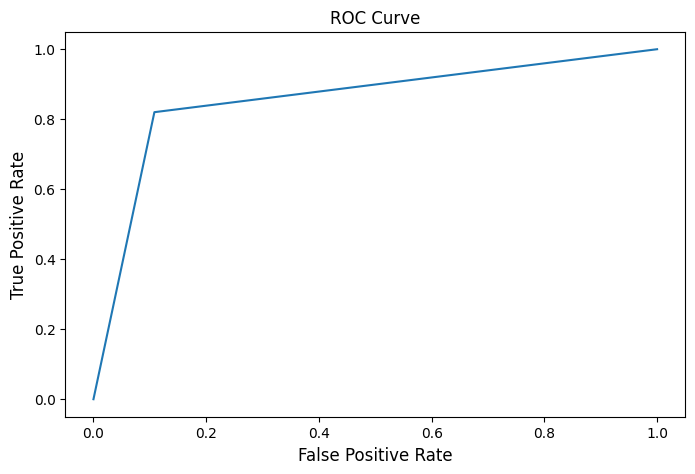

In [73]:
fpr, tpr, threshould = roc_curve(best_pred, ytest)
plt.figure(figsize = (8,5))
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate', size = 12)
plt.ylabel('True Positive Rate', size = 12)
plt.title('ROC Curve', size = 12)
print("AUC value is {}".format(auc(fpr, tpr)))

In [33]:
dcla = DecisionTreeClassifier()
dcla.fit(xtrain, ytrain)
predicted = dcla.predict(xtest)
acu = accuracy_score(predicted, ytest)
print("Accuracy using Descision Tree is {} %".format(acu*100))

Accuracy using Descision Tree is 78.8 %


AUC value is 0.7895330112721417


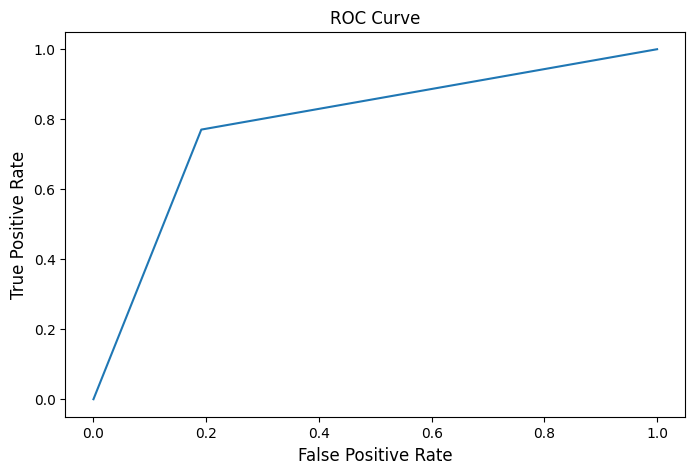

In [34]:
fpr, tpr, threshould = roc_curve(predicted, ytest)
plt.figure(figsize = (8,5))
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate', size = 12)
plt.ylabel('True Positive Rate', size = 12)
plt.title('ROC Curve', size = 12)
print("AUC value is {}".format(auc(fpr, tpr)))

In [35]:
l = []
best_acu = 0
best_pred = 0
for i in range (2, len(data.columns)):
    kcla = KNeighborsClassifier(n_neighbors = i)
    kcla.fit(xtrain, ytrain)
    predicted = kcla.predict(xtest)
    acu = accuracy_score(predicted, ytest)
    l.append(acu)
    if best_acu < acu:
        best_acu = acu
        best_pred = predicted

Accuracy using K Nearest Neighbors is 78.4 %


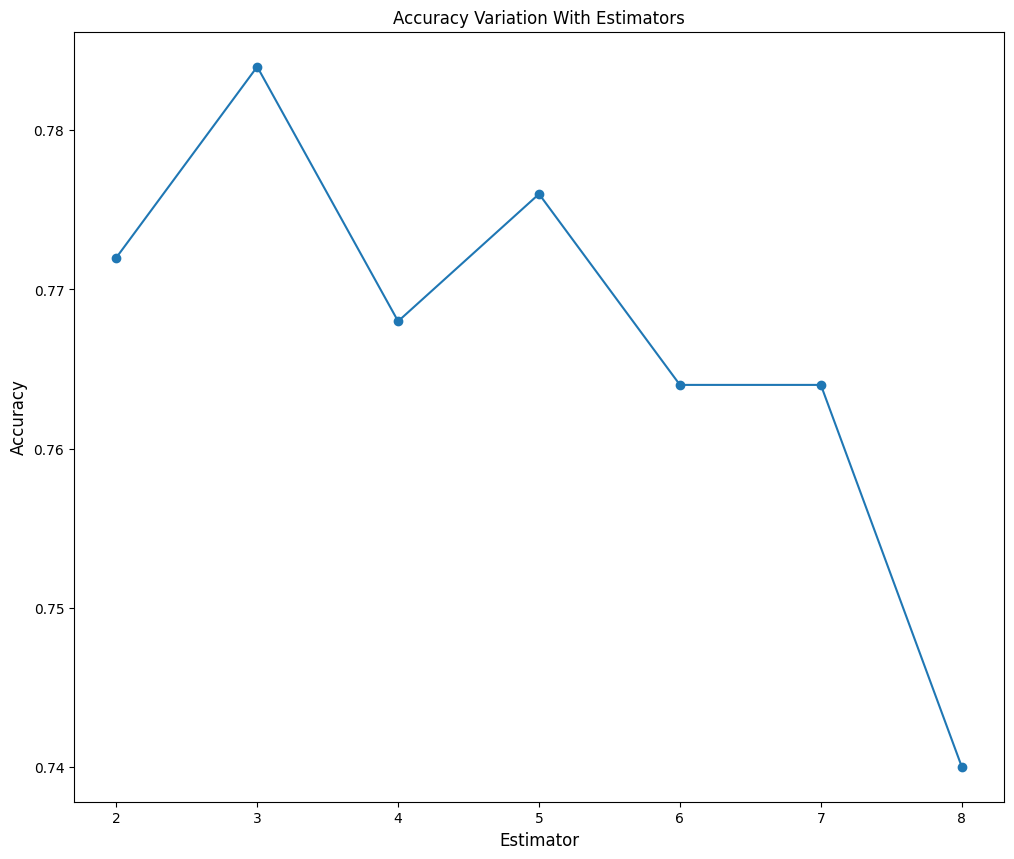

In [36]:
plt.figure(figsize = (12,10))
plt.plot(range (2, len(data.columns)), l, marker = 'o')
plt.xlabel('Estimator', size = 12)
plt.ylabel('Accuracy', size = 12)
plt.title('Accuracy Variation With Estimators', size = 12)
print("Accuracy using K Nearest Neighbors is {} %".format(best_acu*100))

AUC value is 0.7887976004173187


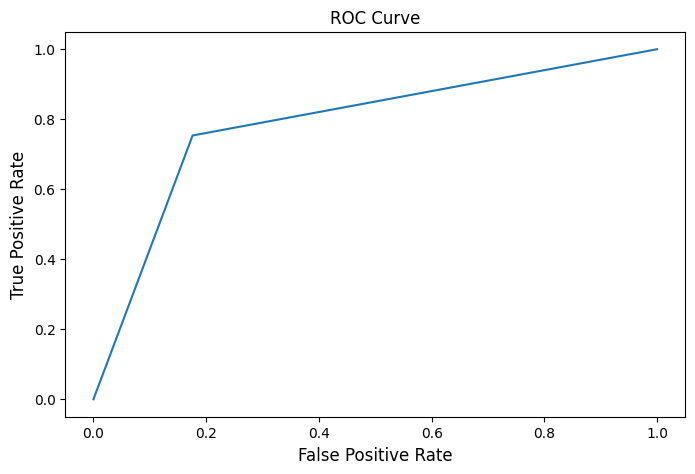

In [37]:
fpr, tpr, threshould = roc_curve(best_pred, ytest)
plt.figure(figsize = (8,5))
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate', size = 12)
plt.ylabel('True Positive Rate', size = 12)
plt.title('ROC Curve', size = 12)
print("AUC value is {}".format(auc(fpr, tpr)))

In [38]:
xcla = XGBClassifier()
xcla.fit(xtrain, ytrain)
predicted = xcla.predict(xtest)
acu = accuracy_score(predicted, ytest)
print("Accuracy using XGBoost is {} %".format(acu*100))

Accuracy using XGBoost is 78.0 %


AUC value is 0.78414340555664


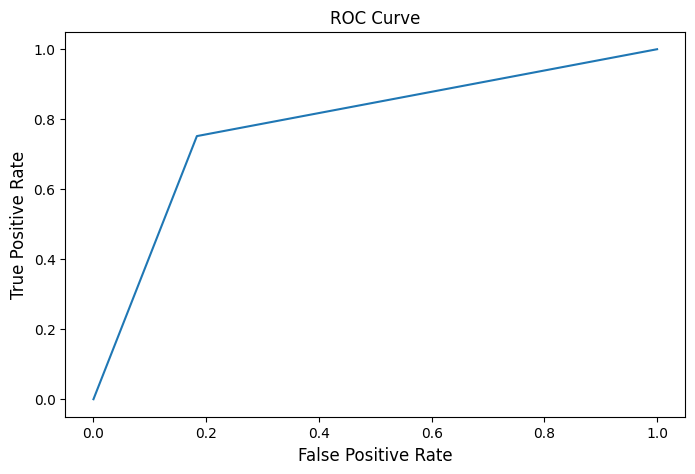

In [39]:
fpr, tpr, threshould = roc_curve(predicted, ytest)
plt.figure(figsize = (8,5))
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate', size = 12)
plt.ylabel('True Positive Rate', size = 12)
plt.title('ROC Curve', size = 12)
print("AUC value is {}".format(auc(fpr, tpr)))

In [40]:
scla = SVC()
scla.fit(xtrain, ytrain)
predicted = scla.predict(xtest)
acu = accuracy_score(predicted, ytest)
print("Accuracy using Support Vector Machine is {} %".format(acu*100))

Accuracy using Support Vector Machine is 77.2 %


AUC value is 0.7784893267651888


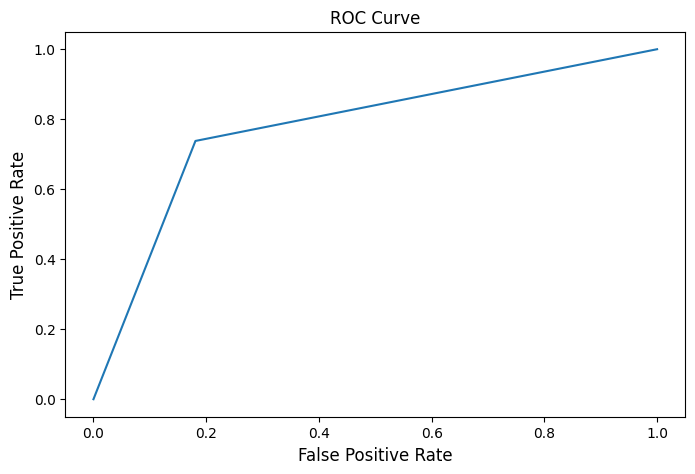

In [41]:
fpr, tpr, threshould = roc_curve(predicted, ytest)
plt.figure(figsize = (8,5))
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate', size = 12)
plt.ylabel('True Positive Rate', size = 12)
plt.title('ROC Curve', size = 12)
print("AUC value is {}".format(auc(fpr, tpr)))